# 1.3.1 Data Generation
#### Code Snippet 1.1: Genertaing clusters/blobs

In [12]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate a Gaussian 2D dataset (blobs)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

#### Code Snippet 1.2: Data/blobs visualization

Text(0.5, 1.0, 'Blobs with lables')

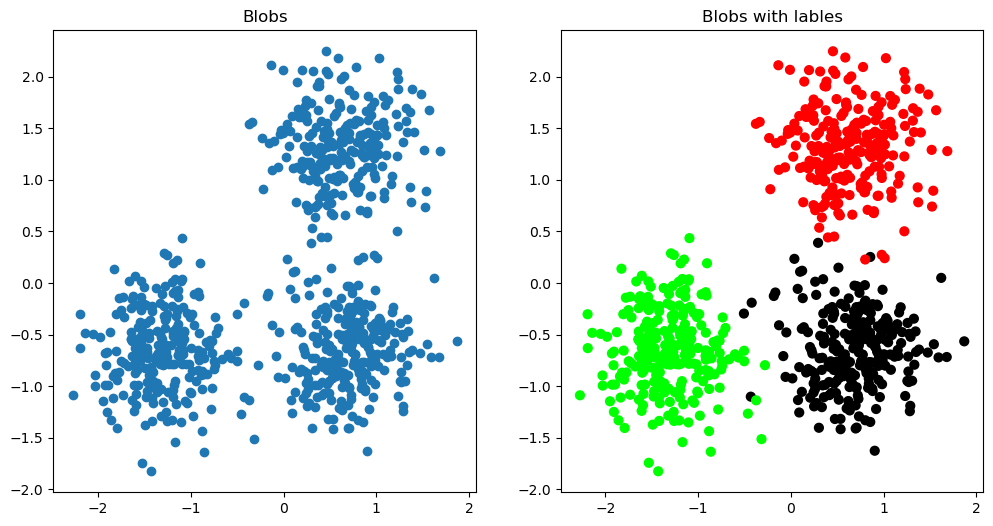

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])
# Plot the blobs without lables
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Blobs')
#plt.show()
# Plot the blobs with lables (Ground Truth (GT)). We will use it for clustering results evaluation
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with lables')
#plt.show()

#### Code Snippet 1.3: Data clustering using KMeans algorithm

In [14]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use K = 3
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)

# 1.3.2 Compute KMeans
#### Code Snippet 1.4: Data/blobs visualization after KMeans clustering

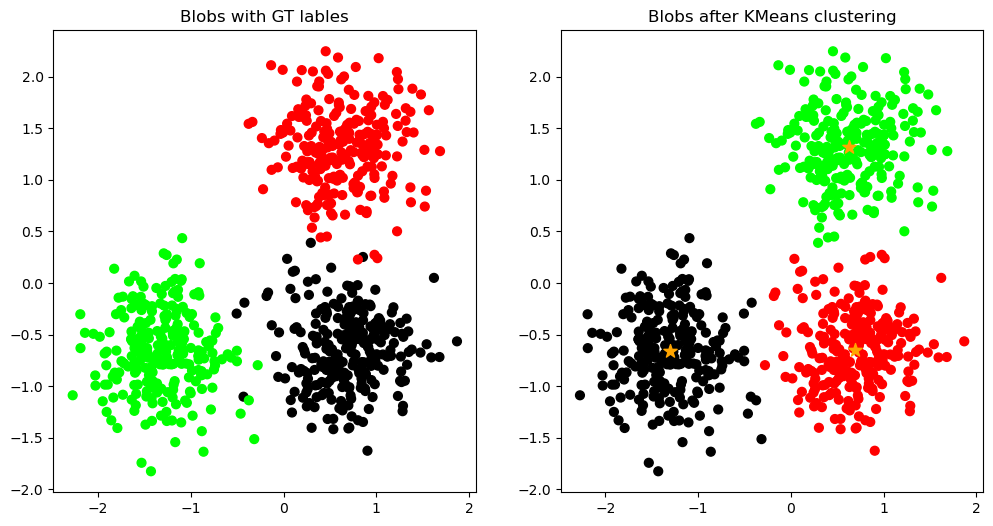

In [15]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after KMeans clustering
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY],s=40)
plt.title('Blobs after KMeans clustering')

# We will also get the coordinates of the cluster centers using KMeans
# .cluster_centers_ and save it as k_means_cluster_centers.
k_means_cluster_centers = model.cluster_centers_

# define the centroid, or cluster center.
cluster_centers = k_means_cluster_centers

#print(cluster_center)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', c='orange',s=100)

# 1.3.3 Compute DBSCAN
#### Code Snippet 1.5: Data clustering using DBSCAN algorithm

In [29]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Params for blobs data
# db = DBSCAN(eps=0.15, min_samples=5).fit(X) # Params for two moons data
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


#### Code Snippet 1.6: Data/blobs visualization after DBSCAN clustering

Text(0.5, 1.0, 'DBSCAN estimated number of clusters: 3')

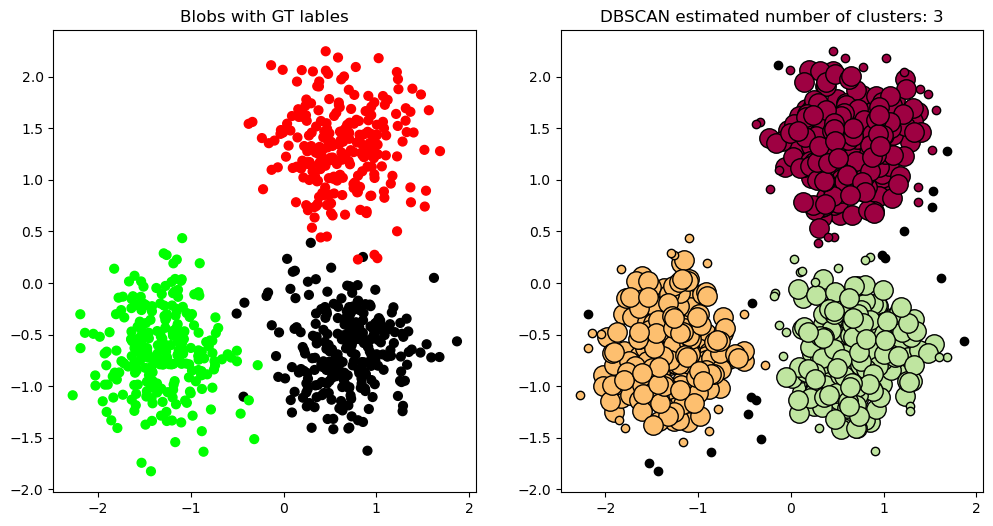

In [30]:
plt.figure(figsize=(12,6))
# Plot the blobs before the clustering

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')

# Plot the blobs after DBSCAN clustering. I used a different visualization/plot to show the core points and the noisy points in different color and size
plt.subplot(1,2,2)
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
         # Black used for noise.
         col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=14,
    )
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
    xy[:, 0],
    xy[:, 1],
    "o",
    markerfacecolor=tuple(col),
    markeredgecolor="k",
    markersize=6,
    )

plt.title(f"DBSCAN estimated number of clusters: {n_clusters_}")

# 1.3.4 Compute Gaussian Mixture Model (GMM)
#### Code Snippet 1.7: Data clustering using GMM algorithm

In [18]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
y_cluster_gmm=gmm.predict(X)

#### Code Snippet 1.8: Data/blobs visualization after GMM clustering

Text(0.5, 1.0, 'Blobs after GMMs clustering')

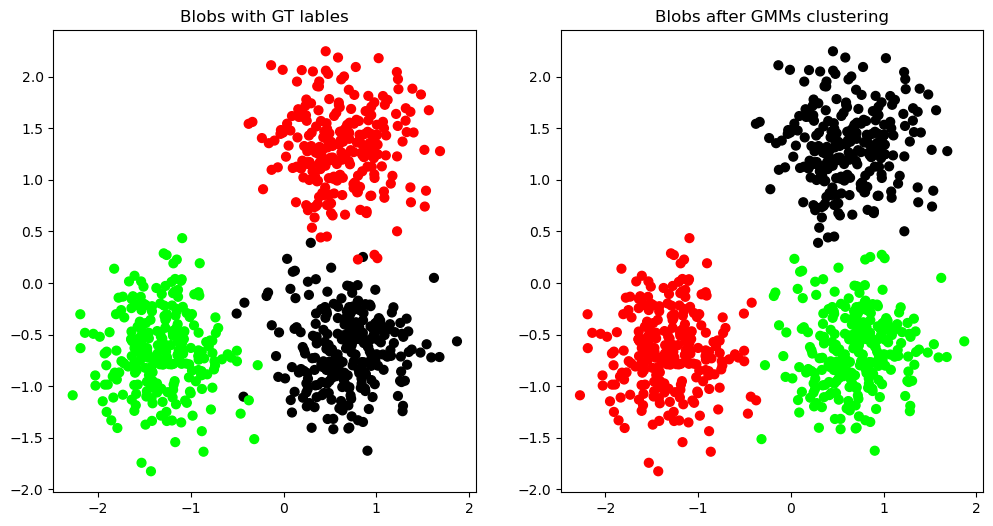

In [19]:
plt.figure(figsize=(12,6))
colormap=np.array(['red','lime','black'])

# Plot the blobs before the clustering
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels_true],s=40)
plt.title('Blobs with GT lables')
# Plot the blobs after KMeans clustering

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y_cluster_gmm],s=40)
plt.title('Blobs after GMMs clustering')

# 1.4 Quantitative results comparison of the cluster-ing methods using evaluation measures
#### Code Snippet 1.9: Quantitative analysis of the clustering methods

In [20]:
print(f"---------------------------")
print(f"DBSCAN Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
print(f"\n---------------------------")
print(f"K-Means Evaluation measures\n")

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, predY):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, predY):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, predY):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, predY):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(labels_true, predY):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, predY):.3f}")

print(f"\n---------------------------")
print(f"GMMs Evaluation measures\n")
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, y_cluster_gmm):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, y_cluster_gmm):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, y_cluster_gmm):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, y_cluster_gmm):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(labels_true, y_cluster_gmm):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X,y_cluster_gmm):.3f}")

---------------------------
DBSCAN Evaluation measures

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626

---------------------------
K-Means Evaluation measures

Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650

---------------------------
GMMs Evaluation measures

Homogeneity: 0.939
Completeness: 0.939
V-measure: 0.939
Adjusted Rand Index: 0.964
Adjusted Mutual Information: 0.938
Silhouette Coefficient: 0.650


## K-means attempts to minimize the total squared error, while k-medoids minimize the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k -means algorithm, k -medoids choose data points as centers (medoids or exemplars). Compare, qualitatively and quantitatively, the results of k-means and k-medoid when applied to the blobs dataset.

In [24]:
! pip install scikit-learn-extra

     ------------------------------------ 346.2/346.2 kB 168.0 kB/s eta 0:00:00


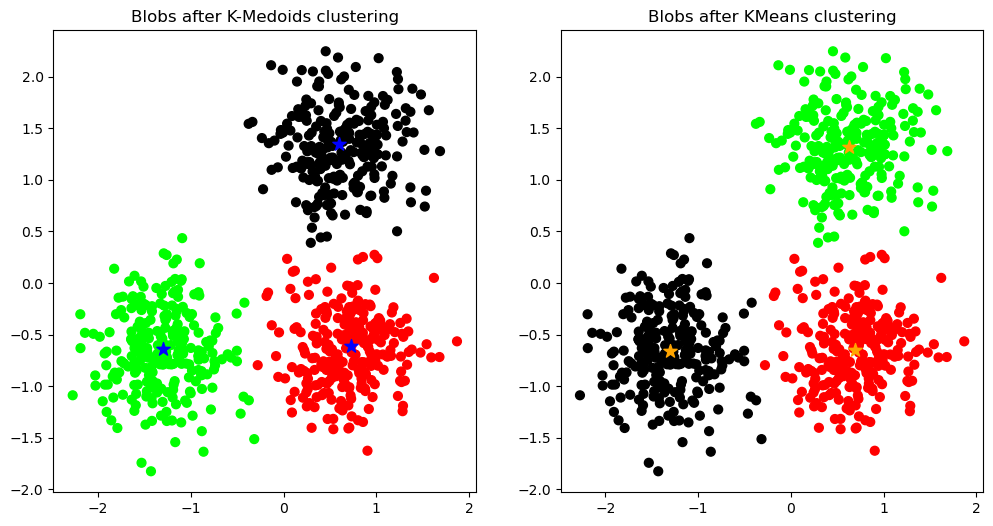

In [27]:
from sklearn_extra.cluster import KMedoids


# Applying K-Medoids clustering
k_medoids = KMedoids(n_clusters=3, random_state=0)
k_medoids.fit(X)
k_medoids_labels = k_medoids.labels_

# Plotting the results of K-Medoids
plt.figure(figsize=(12, 6))

# Plot the blobs after K-Medoids clustering
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[k_medoids_labels], s=40)
plt.title('Blobs after K-Medoids clustering')

# K-Medoids cluster centers
k_medoids_cluster_centers = k_medoids.cluster_centers_

# Plotting the cluster centers
plt.scatter(k_medoids_cluster_centers[:, 0], k_medoids_cluster_centers[:, 1], marker='*', c='blue', s=100)

# Comparison with K-Means
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY], s=40)
plt.title('Blobs after KMeans clustering')

# Plotting K-Means cluster centers for comparison
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', c='orange', s=100)

plt.show()


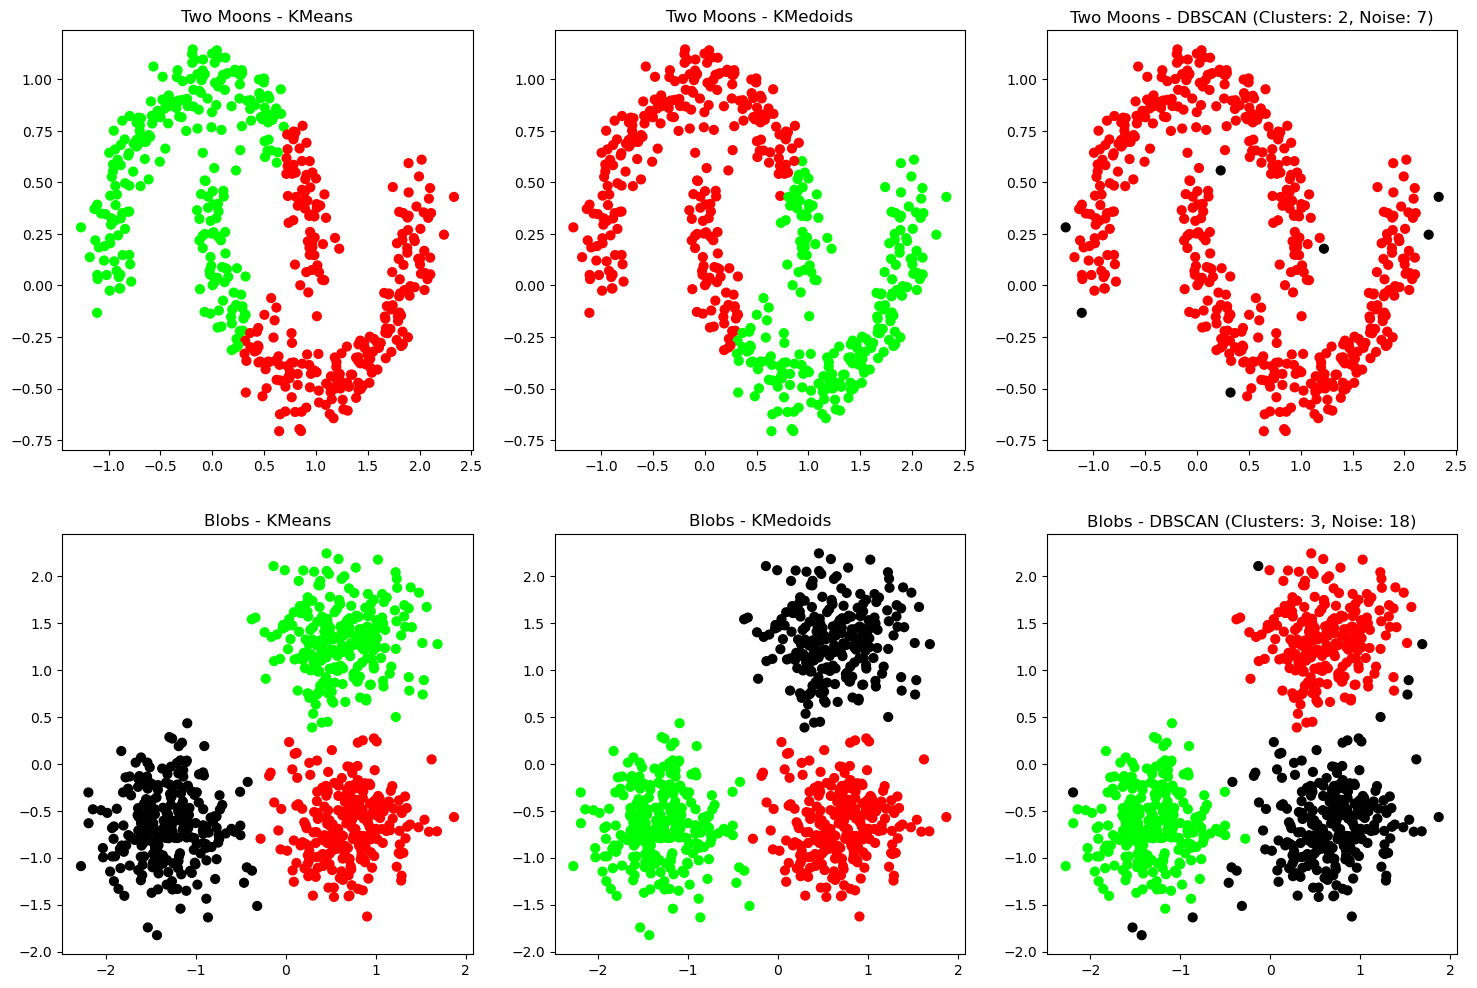

In [35]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Generate the "two moons" dataset
X_moons, labels_true_moons = make_moons(n_samples=500, noise=0.1)

# Applying K-Means to the "two moons" dataset with K=2
kmeans_moons = KMeans(n_clusters=2)
kmeans_moons.fit(X_moons)
kmeans_moons_labels = kmeans_moons.labels_

# Applying K-Medoids to the "two moons" dataset with K=2
k_medoids_moons = KMedoids(n_clusters=2, random_state=0)
k_medoids_moons.fit(X_moons)
k_medoids_moons_labels = k_medoids_moons.labels_

# Applying DBSCAN to the "two moons" dataset with eps=0.15 and min_samples=5
dbscan_moons = DBSCAN(eps=0.15, min_samples=5)
dbscan_moons_labels = dbscan_moons.fit_predict(X_moons)

# Number of clusters and noise points for DBSCAN on "two moons" dataset
n_clusters_moons = len(set(dbscan_moons_labels)) - (1 if -1 in dbscan_moons_labels else 0)
n_noise_moons = list(dbscan_moons_labels).count(-1)

# Visualization setup
plt.figure(figsize=(18, 12))

# Plot for K-Means on "two moons"
plt.subplot(2, 3, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=colormap[kmeans_moons_labels], s=40)
plt.title('Two Moons - KMeans')

# Plot for K-Medoids on "two moons"
plt.subplot(2, 3, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=colormap[k_medoids_moons_labels], s=40)
plt.title('Two Moons - KMedoids')

# Plot for DBSCAN on "two moons"
plt.subplot(2, 3, 3)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=colormap[dbscan_moons_labels], s=40)
plt.title(f'Two Moons - DBSCAN (Clusters: {2}, Noise: {n_noise_moons})')

# We already have results for "blobs" dataset, so we'll plot those for comparison
# K-Means on "blobs"
plt.subplot(2, 3, 4)
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY], s=40)
plt.title('Blobs - KMeans')

# K-Medoids on "blobs"
plt.subplot(2, 3, 5)
plt.scatter(X[:, 0], X[:, 1], c=colormap[k_medoids_labels], s=40)
plt.title('Blobs - KMedoids')

# DBSCAN on "blobs" (previously computed)
plt.subplot(2, 3, 6)
plt.scatter(X[:, 0], X[:, 1], c=colormap[labels], s=40)
plt.title(f'Blobs - DBSCAN (Clusters: {n_clusters_}, Noise: {n_noise_})')

plt.show()

Blobs Dataset
Estimated number of clusters: 7
Estimated number of noise points: 415
Two Moons Dataset
Estimated number of clusters: 2
Estimated number of noise points: 3


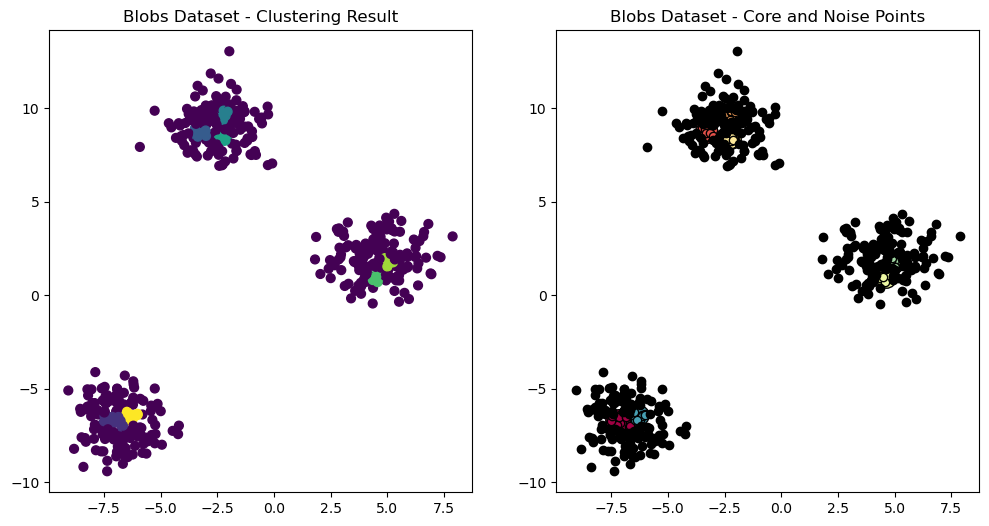

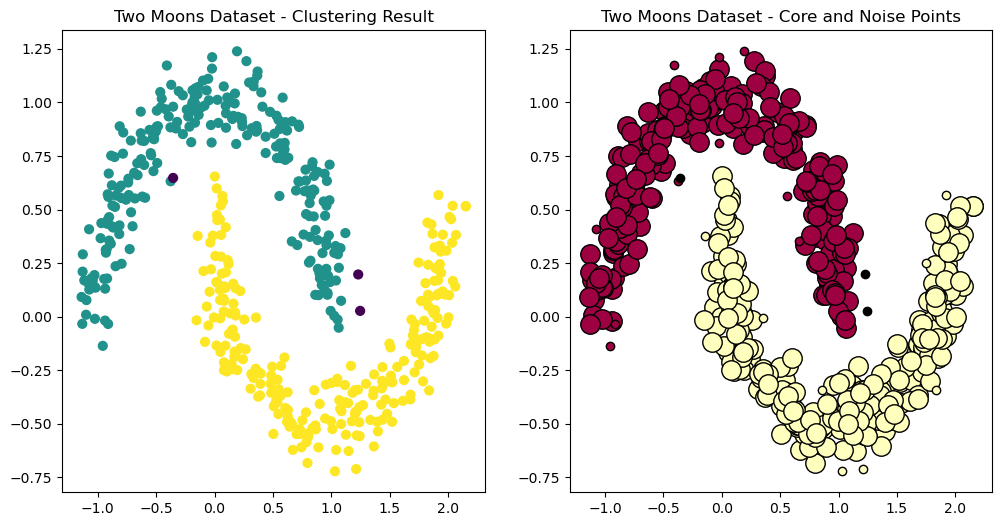

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Function to apply DBSCAN and plot results
def apply_dbscan(X, eps, min_samples, title):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(title)
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    # Plotting
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)
    plt.title(f'{title} - Clustering Result')

    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    plt.subplot(1,2,2)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = labels == k
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    plt.title(f'{title} - Core and Noise Points')

# Blobs dataset
X_blobs, labels_true_blobs = make_blobs(n_samples=500, centers=3, cluster_std=1.05, random_state=42)
apply_dbscan(X_blobs, eps=0.3, min_samples=10, title='Blobs Dataset')

# Two moons dataset
X_moons, labels_true_moons = make_moons(n_samples=500, noise=0.1)
apply_dbscan(X_moons, eps=0.15, min_samples=5, title='Two Moons Dataset')

plt.show()


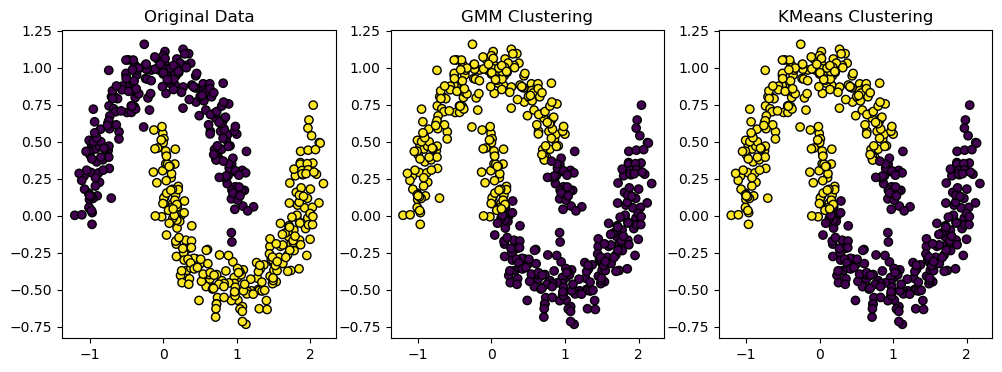

Adjusted Rand Index (ARI):
GMM: 0.4833812882979477
KMeans: 0.4833812882979477

Silhouette Score:
GMM: 0.4848565864934242
KMeans: 0.4848565864934242


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Generate two moons dataset
X, labels_true = make_moons(n_samples=500, noise=0.1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (2 for two moons)
n_clusters = 2

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Fit KMeans for comparison
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot the results
plt.figure(figsize=(12, 4))

# Plot Original Data
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap='viridis', edgecolors='k')
plt.title("Original Data")

# Plot GMM Clustering
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolors='k')
plt.title("GMM Clustering")

# Plot KMeans Clustering
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title("KMeans Clustering")

plt.show()

# Quantitative Comparison
ari_gmm = adjusted_rand_score(labels_true, gmm_labels)
ari_kmeans = adjusted_rand_score(labels_true, kmeans_labels)

silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

print("Adjusted Rand Index (ARI):")
print("GMM:", ari_gmm)
print("KMeans:", ari_kmeans)
print("\nSilhouette Score:")
print("GMM:", silhouette_gmm)
print("KMeans:", silhouette_kmeans)


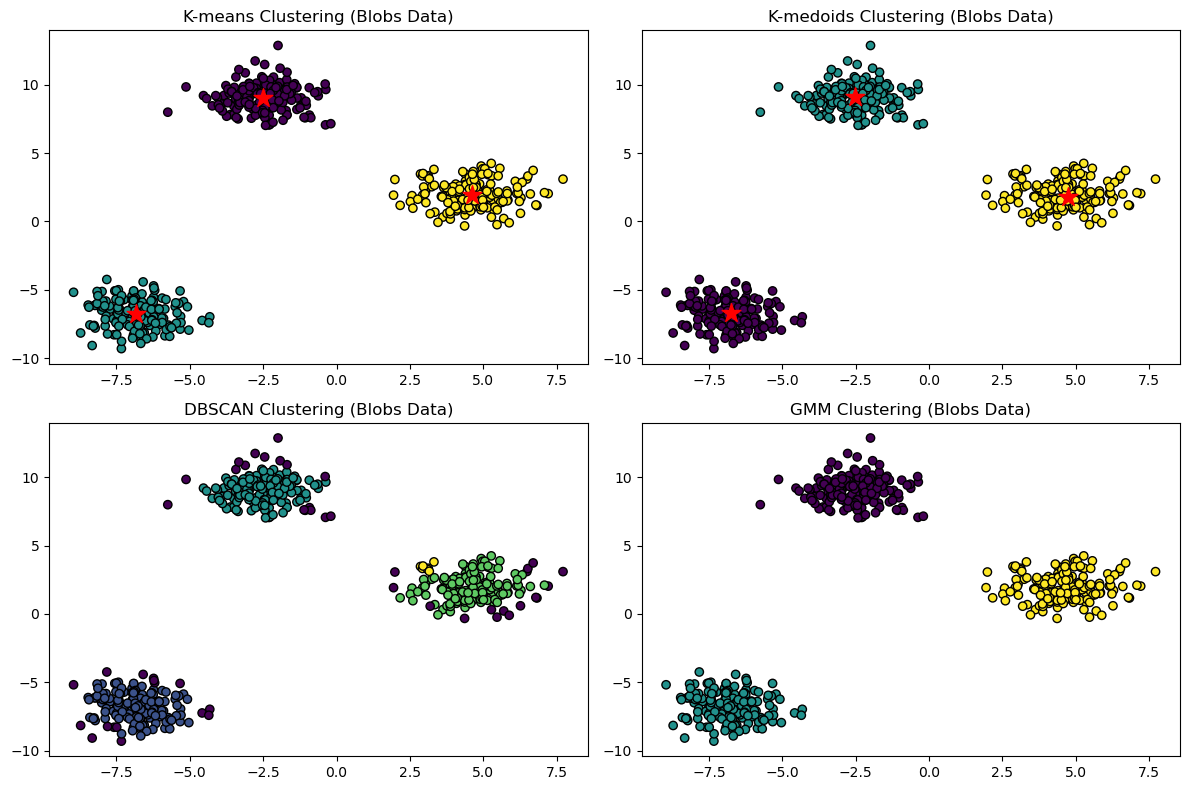

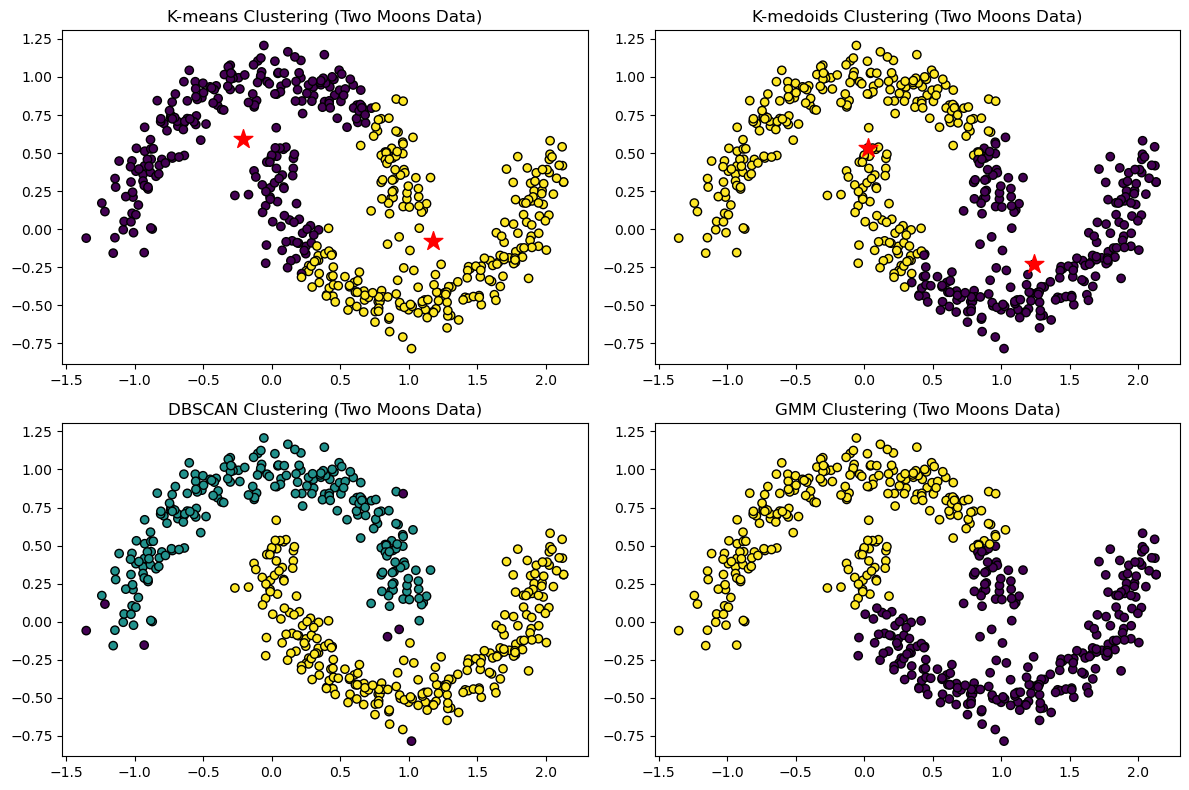

Evaluation measures for blobs data:
K-means:
Homogeneity Score: 1.0
Completeness Score: 1.0
V-measure Score: 1.0
Adjusted Rand Index Score: 1.0
Silhouette Score: 0.8437565906781406

K-medoids:
Homogeneity Score: 1.0
Completeness Score: 1.0
V-measure Score: 1.0
Adjusted Rand Index Score: 1.0
Silhouette Score: 0.8437565906781406

DBSCAN:
Homogeneity Score: 0.902036550546982
Completeness Score: 0.7242561077365297
V-measure Score: 0.8034291710137597
Adjusted Rand Index Score: 0.8262113188526355
Silhouette Score: 0.5240093460562923

GMM:
Homogeneity Score: 1.0
Completeness Score: 1.0
V-measure Score: 1.0
Adjusted Rand Index Score: 1.0
Silhouette Score: 0.8437565906781406

Evaluation measures for two moons data:
K-means:
Homogeneity Score: 0.20497683227674166
Completeness Score: 0.2049862958244858
V-measure Score: 0.20498156394138592
Adjusted Rand Index Score: 0.26893503371116034
Silhouette Score: 0.47738045147361835

K-medoids:
Homogeneity Score: 0.21206002408861732
Completeness Score: 0.21

In [54]:
X_blobs, y_blobs = make_blobs(n_samples=500, centers=3, random_state=42)

# Generate two moons data
X_moons, y_moons = make_moons(n_samples=500, noise=0.1)

# Apply K-means clustering on blobs data
kmeans_blobs = KMeans(n_clusters=3, random_state=42)
kmeans_labels_blobs = kmeans_blobs.fit_predict(X_blobs)

# Apply K-medoids clustering on blobs data
kmedoids_blobs = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels_blobs = kmedoids_blobs.fit_predict(X_blobs)

# Apply DBSCAN clustering on blobs data
dbscan_blobs = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_blobs = dbscan_blobs.fit_predict(X_blobs)

# Apply GMM clustering on blobs data
gmm_blobs = GaussianMixture(n_components=3, random_state=42)
gmm_labels_blobs = gmm_blobs.fit_predict(X_blobs)

# Apply K-means clustering on two moons data
kmeans_moons = KMeans(n_clusters=2, random_state=42)
kmeans_labels_moons = kmeans_moons.fit_predict(X_moons)

# Apply K-medoids clustering on two moons data
kmedoids_moons = KMedoids(n_clusters=2, random_state=42)
kmedoids_labels_moons = kmedoids_moons.fit_predict(X_moons)

# Apply DBSCAN clustering on two moons data
dbscan_moons = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels_moons = dbscan_moons.fit_predict(X_moons)

# Apply GMM clustering on two moons data
gmm_moons = GaussianMixture(n_components=2, random_state=42)
gmm_labels_moons = gmm_moons.fit_predict(X_moons)

# Plot the results for blobs data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmeans_labels_blobs, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_blobs.cluster_centers_[:, 0], kmeans_blobs.cluster_centers_[:, 1], marker='*', color='red', s=200)
plt.title('K-means Clustering (Blobs Data)')

plt.subplot(2, 2, 2)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmedoids_labels_blobs, cmap='viridis', edgecolors='k')
plt.scatter(kmedoids_blobs.cluster_centers_[:, 0], kmedoids_blobs.cluster_centers_[:, 1], marker='*', color='red', s=200)
plt.title('K-medoids Clustering (Blobs Data)')

plt.subplot(2, 2, 3)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=dbscan_labels_blobs, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering (Blobs Data)')

plt.subplot(2, 2, 4)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=gmm_labels_blobs, cmap='viridis', edgecolors='k')
plt.title('GMM Clustering (Blobs Data)')

plt.tight_layout()
plt.show()

# Plot the results for two moons data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=kmeans_labels_moons, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1], marker='*', color='red', s=200)
plt.title('K-means Clustering (Two Moons Data)')

plt.subplot(2, 2, 2)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=kmedoids_labels_moons, cmap='viridis', edgecolors='k')
plt.scatter(kmedoids_moons.cluster_centers_[:, 0], kmedoids_moons.cluster_centers_[:, 1], marker='*', color='red', s=200)
plt.title('K-medoids Clustering (Two Moons Data)')

plt.subplot(2, 2, 3)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=dbscan_labels_moons, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering (Two Moons Data)')

plt.subplot(2, 2, 4)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=gmm_labels_moons, cmap='viridis', edgecolors='k')
plt.title('GMM Clustering (Two Moons Data)')

plt.tight_layout()
plt.show()

# Evaluate clustering methods on blobs data
print("Evaluation measures for blobs data:")
print("K-means:")
print("Homogeneity Score:", metrics.homogeneity_score(y_blobs, kmeans_labels_blobs))
print("Completeness Score:", metrics.completeness_score(y_blobs, kmeans_labels_blobs))
print("V-measure Score:", metrics.v_measure_score(y_blobs, kmeans_labels_blobs))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_blobs, kmeans_labels_blobs))
print("Silhouette Score:", metrics.silhouette_score(X_blobs, kmeans_labels_blobs))

print("\nK-medoids:")
print("Homogeneity Score:", metrics.homogeneity_score(y_blobs, kmedoids_labels_blobs))
print("Completeness Score:", metrics.completeness_score(y_blobs, kmedoids_labels_blobs))
print("V-measure Score:", metrics.v_measure_score(y_blobs, kmedoids_labels_blobs))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_blobs, kmedoids_labels_blobs))
print("Silhouette Score:", metrics.silhouette_score(X_blobs, kmedoids_labels_blobs))

print("\nDBSCAN:")
print("Homogeneity Score:", metrics.homogeneity_score(y_blobs, dbscan_labels_blobs))
print("Completeness Score:", metrics.completeness_score(y_blobs, dbscan_labels_blobs))
print("V-measure Score:", metrics.v_measure_score(y_blobs, dbscan_labels_blobs))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_blobs, dbscan_labels_blobs))
print("Silhouette Score:", metrics.silhouette_score(X_blobs, dbscan_labels_blobs))

print("\nGMM:")
print("Homogeneity Score:", metrics.homogeneity_score(y_blobs, gmm_labels_blobs))
print("Completeness Score:", metrics.completeness_score(y_blobs, gmm_labels_blobs))
print("V-measure Score:", metrics.v_measure_score(y_blobs, gmm_labels_blobs))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_blobs, gmm_labels_blobs))
print("Silhouette Score:", metrics.silhouette_score(X_blobs, gmm_labels_blobs))

# Evaluate clustering methods on two moons data
print("\nEvaluation measures for two moons data:")
print("K-means:")
print("Homogeneity Score:", metrics.homogeneity_score(y_moons, kmeans_labels_moons))
print("Completeness Score:", metrics.completeness_score(y_moons, kmeans_labels_moons))
print("V-measure Score:", metrics.v_measure_score(y_moons, kmeans_labels_moons))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_moons, kmeans_labels_moons))
print("Silhouette Score:", metrics.silhouette_score(X_moons, kmeans_labels_moons))

print("\nK-medoids:")
print("Homogeneity Score:", metrics.homogeneity_score(y_moons, kmedoids_labels_moons))
print("Completeness Score:", metrics.completeness_score(y_moons, kmedoids_labels_moons))
print("V-measure Score:", metrics.v_measure_score(y_moons, kmedoids_labels_moons))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_moons, kmedoids_labels_moons))
print("Silhouette Score:", metrics.silhouette_score(X_moons, kmedoids_labels_moons))

print("\nDBSCAN:")
print("Homogeneity Score:", metrics.homogeneity_score(y_moons, dbscan_labels_moons))
print("Completeness Score:", metrics.completeness_score(y_moons, dbscan_labels_moons))
print("V-measure Score:", metrics.v_measure_score(y_moons, dbscan_labels_moons))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_moons, dbscan_labels_moons))
print("Silhouette Score:", metrics.silhouette_score(X_moons, dbscan_labels_moons))

print("\nGMM:")
print("Homogeneity Score:", metrics.homogeneity_score(y_moons, gmm_labels_moons))
print("Completeness Score:", metrics.completeness_score(y_moons, gmm_labels_moons))
print("V-measure Score:", metrics.v_measure_score(y_moons, gmm_labels_moons))
print("Adjusted Rand Index Score:", metrics.adjusted_rand_score(y_moons, gmm_labels_moons))
print("Silhouette Score:", metrics.silhouette_score(X_moons, gmm_labels_moons))


In [57]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt

# Load the input image
image = Image.open("Untitled.png")
# Convert the image to a numpy array
image_array = np.array(image)

# Reshape the image array to a 2D array of pixels
pixels = image_array.reshape(-1, 3)

# Perform K-means clustering with K=2, K=5, and K=10 clusters
k_values = [2, 5, 10]
clustered_images = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pixels)
    clustered_pixels = kmeans.cluster_centers_[labels]
    clustered_image = clustered_pixels.reshape(image_array.shape)
    clustered_images.append(clustered_image)

# Display the resulting images
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")

for i, clustered_image in enumerate(clustered_images):
    axes[i+1].imshow(clustered_image.astype(np.uint8))
    axes[i+1].set_title(f"K = {k_values[i]}")

plt.show()


ValueError: cannot reshape array of size 57188000 into shape (3)